To do: SIGMOID PROBABILITIES NOT FOUND
    
    OUR GOAL : calculate logistic regression without using external libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
model = LinearRegression()
model.fit(df[['age']],df.bought_insurance) #fit(dataframe,series)

LinearRegression()

In [4]:
model.coef_ #value of slope (m)

array([0.02368394])

In [16]:
model.intercept_ # value of intercept(b)

-0.4209443697498303

In [6]:
pred = model.predict(df[['age']]) #returns y from linear regression (y = mx +b)
pred

array([0.10010227, 0.17115409, 0.69220073, 0.81062042, 0.66851679,
       0.90535618, 0.88167224, 1.00009193, 1.04745981, 1.02377587,
       0.00536652, 0.2422059 , 0.21852197, 0.26588984, 0.73956861,
       0.88167224, 0.17115409, 0.95272406, 0.02905046, 0.00536652,
       0.07641834, 0.19483803, 0.52641316, 0.64483286, 0.76325255,
       0.8579883 , 0.12378621])

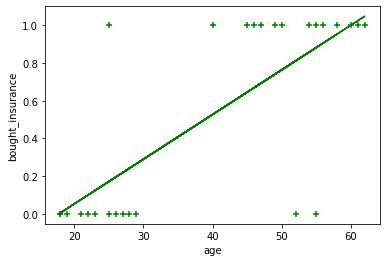

In [25]:
plt.xlabel('age')
plt.ylabel('bought_insurance')

plt.scatter(df.age,df.bought_insurance,color= 'green',marker = '+')
plt.plot(df.age,pred,color= 'green') 

__Substituting y from linear regression in sigmoid__

In [7]:
sigmoid_y = (1/ (1 + np.exp(-pred)))
sigmoid_y

array([0.52500469, 0.54268437, 0.66645631, 0.6922417 , 0.66117097,
       0.71204895, 0.70716863, 0.73107665, 0.74028681, 0.73570744,
       0.50134163, 0.56025719, 0.55441413, 0.56608359, 0.67690152,
       0.70716863, 0.54268437, 0.72166268, 0.5072621 , 0.50134163,
       0.51909529, 0.548556  , 0.62864615, 0.65584512, 0.68205948,
       0.70224018, 0.5309071 ])

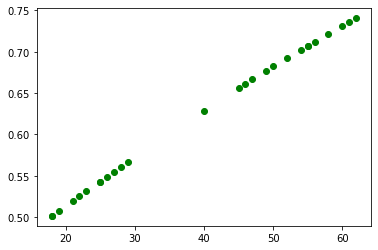

In [27]:
plt.scatter(df.age,sigmoid_y,color= 'green') # just for trial

In [8]:
np.exp(-pred)

array([0.90474488, 0.84269171, 0.50047345, 0.44458215, 0.51246811,
       0.40439782, 0.41408987, 0.36784562, 0.35082779, 0.35923595,
       0.99464785, 0.78489455, 0.80370583, 0.76652356, 0.47731978,
       0.41408987, 0.84269171, 0.38568895, 0.97136745, 0.99464785,
       0.92642857, 0.82296795, 0.59071999, 0.52475024, 0.46614779,
       0.42401421, 0.88356872])

In [9]:
def sig_prob(X):
    sigmoid_list = []
    for i in X:
        if (i >0.5):
            sigmoid_list.append(1)
        else:
            sigmoid_list.append[0]
    return sigmoid_list

In [10]:
np.array(sig_prob(sigmoid_y)) #converting list to array for better view. list elements were printed 1 on each line.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

__Comparing with logistic regression__

In [11]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression() # creating object from class
modelLR.fit(df[['age']],df.bought_insurance)

LogisticRegression()

In [12]:
modelLR.coef_

array([[0.1354656]])

In [13]:
modelLR.intercept_

array([-5.26279696])

In [14]:
modelLR.predict(df[['age']])

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0], dtype=int64)

In [21]:
predict_proba = modelLR.predict_proba(df[['age']])
predict_proba

array([[0.90742181, 0.09257819],
       [0.86716909, 0.13283091],
       [0.24897506, 0.75102494],
       [0.14412861, 0.85587139],
       [0.27515554, 0.72484446],
       [0.08921347, 0.91078653],
       [0.10085042, 0.89914958],
       [0.05390402, 0.94609598],
       [0.04164368, 0.95835632],
       [0.04739857, 0.95260143],
       [0.94398106, 0.05601894],
       [0.81302094, 0.18697906],
       [0.8327475 , 0.1672525 ],
       [0.79155013, 0.20844987],
       [0.20181043, 0.79818957],
       [0.10085042, 0.89914958],
       [0.86716909, 0.13283091],
       [0.06951213, 0.93048787],
       [0.93637149, 0.06362851],
       [0.94398106, 0.05601894],
       [0.91819109, 0.08180891],
       [0.85077487, 0.14922513],
       [0.4611219 , 0.5388781 ],
       [0.30297839, 0.69702161],
       [0.18086723, 0.81913277],
       [0.11381561, 0.88618439],
       [0.89539637, 0.10460363]])